In [71]:
# imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
#read data from csv
account_data = pd.read_csv('Converted to CSV\\account.csv')
card_data = pd.read_csv('Converted to CSV\\card.csv')
client_data = pd.read_csv('Converted to CSV\\client.csv')
district_data = pd.read_csv('Converted to CSV\\district.csv')
disp_data = pd.read_csv('Converted to CSV\\disp.csv')
loan_data = pd.read_csv('Converted to CSV\\loan.csv')
order_data = pd.read_csv('Converted to CSV\\order.csv')
tx_data = pd.read_csv('Converted to CSV\\trans.csv', delimiter=";")

c:\users\sharm\anaconda3\envs\crm\lib\site-packages\IPython\core\interactiveshell.py:3170: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Dataset Info.

# Real anonymized Czech bank transactions, account info, and loan records released for PKDD'99 Discovery Challenge

The data about the clients and their accounts consist of following relations:

-relation account (4500 objects in the file ACCOUNT.ASC) - each record describes static characteristics of an account,

-relation client (5369 objects in the file CLIENT.ASC) - each record describes characteristics of a client,

-relation disposition (5369 objects in the file DISP.ASC) - each record relates together a client with an account i.e. this relation describes the rights of clients to operate accounts,

-relation permanent order (6471 objects in the file ORDER.ASC) - each record describes characteristics of a payment order,

-relation transaction (1056320 objects in the file TRANS.ASC) - each record describes one transaction on an account,

-relation loan (682 objects in the file LOAN.ASC) - each record describes a loan granted for a given account,

-relation credit card (892 objects in the file CARD.ASC) - each record describes a credit card issued to an account,

-relation demographic data (77 objects in the file DISTRICT.ASC) - each record describes demographic characteristics of a district.

Each account has both static characteristics (e.g. date of creation, address of the branch) given in relation "account" and dynamic characteristics (e.g. payments debited or credited, balances) given in relations "permanent order" and "transaction". Relation "client" describes characteristics of persons who can manipulate with the accounts. One client can have more accounts, more clients can manipulate with single account; clients and accounts are related together in relation "disposition". Relations "loan" and "credit card" describe some services which the bank offers to its clients; more credit cards can be issued to an account, at most one loan can be granted for an account. Relation "demographic data" gives some publicly available information about the districts (e.g. the unemployment rate); additional information about the clients can be deduced from this.

In [73]:
def basic_Info(df):
    print("##################### Shape #####################")
    print(df.shape)
    print("##################### Types #####################")
    print(df.dtypes)
    print("##################### Head #####################")
    print(df.head(3))
    print("##################### Tail #####################")
    print(df.tail(3))
    print("##################### NA #####################")
    print(df.isnull().sum())
    print("##################### Quantiles #####################")
    print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print("##################### Describe #####################")
    print(df.describe().T)
    
def column_Info(df,col):
    for col in df.columns:
        sorting = df[col].value_counts().sort_values(ascending=False)
        print("##################### Sorting #####################")
        print(sorting)

In [74]:
basic_Info(account_data)

##################### Shape #####################
(4500, 4)
##################### Types #####################
account_id      int64
district_id     int64
frequency      object
date            int64
dtype: object
##################### Head #####################
   account_id  district_id         frequency    date
0         576           55  POPLATEK MESICNE  930101
1        3818           74  POPLATEK MESICNE  930101
2         704           55  POPLATEK MESICNE  930101
##################### Tail #####################
      account_id  district_id         frequency    date
4497         777           30  POPLATEK MESICNE  971228
4498        1573           63  POPLATEK MESICNE  971229
4499        3276            1  POPLATEK MESICNE  971229
##################### NA #####################
account_id     0
district_id    0
frequency      0
date           0
dtype: int64
##################### Quantiles #####################
                 0.00       0.05      0.50       0.95       0.99      1.

In [75]:
#replacing column names 
account_data.replace({'frequency' : { 'POPLATEK MESICNE' : 'MONTHLY ISSUANCE (MI)', 'POPLATEK TYDNE' : 'WEEKLY ISSUANCE (WI)', 'POPLATEK PO OBRATU' : 'ISSUANCE AFTER TRANSACTION (TI)', }}, inplace = True)
#changing date format
account_data['date'] = pd.to_datetime(account_data['date'], format = '%y%m%d', errors = 'coerce')
#deriving tenure
account_data["Tenure"] = 1998 - pd.DatetimeIndex(account_data['date']).year


In [78]:
column_Info(account_data, col)

##################### Sorting #####################
2049     1
16       1
4102     1
8        1
2057     1
        ..
10227    1
1033     1
4086     1
2039     1
2047     1
Name: account_id, Length: 4500, dtype: int64
##################### Sorting #####################
1     554
70    152
74    135
54    128
64     92
     ... 
37     37
49     37
20     36
22     36
58     32
Name: district_id, Length: 77, dtype: int64
##################### Sorting #####################
MONTHLY ISSUANCE (MI)              4167
WEEKLY ISSUANCE (WI)                240
ISSUANCE AFTER TRANSACTION (TI)      93
Name: frequency, dtype: int64
##################### Sorting #####################
1993-02-08    13
1993-10-08    12
1996-06-25    11
1996-11-24    11
1997-08-08    10
              ..
1994-05-07     1
1996-01-30     1
1997-12-15     1
1993-08-22     1
1993-12-23     1
Name: date, Length: 1535, dtype: int64
##################### Sorting #####################
2    1363
5    1139
1     898
3     661
4   

In [92]:
account_data.head(5)

,account_id,district_id,frequency,date,Tenure
0,576,55,MONTHLY ISSUANCE (MI),1993-01-01,5
1,3818,74,MONTHLY ISSUANCE (MI),1993-01-01,5
2,704,55,MONTHLY ISSUANCE (MI),1993-01-01,5
3,2378,16,MONTHLY ISSUANCE (MI),1993-01-01,5
4,2632,24,MONTHLY ISSUANCE (MI),1993-01-02,5


<Figure size 576x576 with 0 Axes>

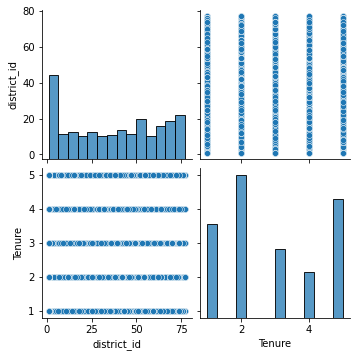

In [94]:
dfplot = account_data.iloc[: , [1, 2, 4]].copy()
plt.figure(figsize=(8,8))
sns.pairplot(dfplot)

In [79]:
basic_Info(client_data)

##################### Shape #####################
(5369, 3)
##################### Types #####################
client_id       int64
birth_number    int64
district_id     int64
dtype: object
##################### Head #####################
   client_id  birth_number  district_id
0          1        706213           18
1          2        450204            1
2          3        406009            1
##################### Tail #####################
      client_id  birth_number  district_id
5366      13968        680413           61
5367      13971        626019           67
5368      13998        535812           74
##################### NA #####################
client_id       0
birth_number    0
district_id     0
dtype: int64
##################### Quantiles #####################
                  0.00      0.05      0.50      0.95       0.99      1.00
client_id          1.0     285.4    2839.0   10477.8   13260.32   13998.0
birth_number  110820.0  230419.6  540829.0  790271.4  812472.76 

In [80]:
# adding columns for birth_date, gender and age
client_data = client_data.join(pd.DataFrame({'birth_date': np.nan, 'gender': np.nan, 'age': np.nan}, index = client_data.index))

# deriving gender from birth_number
client_data['birth_date'] = client_data['birth_number']
for ids, item in enumerate(client_data['birth_number']):
    if int(str(item)[2:4]) > 50:
        client_data.loc[ids, 'gender'] = 0 #female
        client_data.loc[ids, 'birth_date'] = item - 5000 
    else: 
        client_data.loc[ids, 'gender'] = 1 #male
        
# deriving birth_date
client_data['birth_date'] = pd.to_datetime(client_data['birth_date'], format = '%y%m%d', errors = 'coerce')

# date rectifying function
def rectify(date):
    if date.year > 2000:
        date = date.replace (year = date.year - 100)
        return date
    else:
        return date

# correcting birth_date
client_data['birth_date'] = client_data['birth_date'].apply(rectify)

client_data["age"] = 1998 - pd.DatetimeIndex(client_data['birth_date']).year

In [81]:
column_Info(client_data, col)

##################### Sorting #####################
2049    1
28      1
2053    1
4102    1
8       1
       ..
2039    1
4090    1
2043    1
4094    1
2047    1
Name: client_id, Length: 5369, dtype: int64
##################### Sorting #####################
475713    4
396027    3
540603    3
445209    3
695317    3
         ..
230911    1
525827    1
491012    1
276001    1
350205    1
Name: birth_number, Length: 5019, dtype: int64
##################### Sorting #####################
1     663
74    180
70    169
54    155
64    109
     ... 
58     44
65     44
12     44
24     43
20     43
Name: district_id, Length: 77, dtype: int64
##################### Sorting #####################
1971-02-28    4
1947-07-13    4
1965-07-25    4
1952-08-26    4
1970-10-07    4
             ..
1925-09-23    1
1959-08-29    1
1939-06-06    1
1943-12-30    1
1978-11-21    1
Name: birth_date, Length: 4738, dtype: int64
##################### Sorting #####################
1.0    2724
0.0    2645
Name: ge

In [95]:
client_data.head(5)

,client_id,birth_number,district_id,birth_date,gender,age
0,1,706213,18,1970-12-13,0.0,28
1,2,450204,1,1945-02-04,1.0,53
2,3,406009,1,1940-10-09,0.0,58
3,4,561201,5,1956-12-01,1.0,42
4,5,605703,5,1960-07-03,0.0,38


<Figure size 576x576 with 0 Axes>

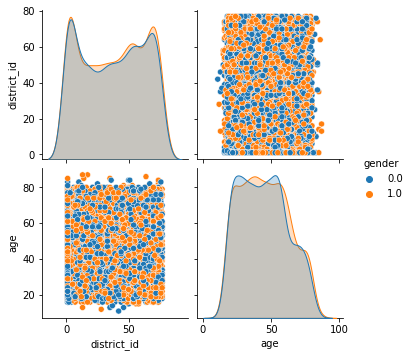

In [98]:
plotdf = client_data.iloc[: , [2, 4, 5]].copy()
plt.figure(figsize=(8,8))
sns.pairplot(plotdf, hue = 'gender')